### 1. 데이터 그룹 연산 - group by

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
'''
통계자료에서 그룹 함수 가장 많이 사용한다.
그룹핑 시키는 방법
합, 평균, 최대, 최소, ... 총합 기능이 다 제공된다.
사용자 정의 함수 만들고 가져다 쓰는 방법도 소개
'''

특정 컬럼의 유니크 값을 통해서 다른 독립변수와의 비교를통해

In [4]:
df = pd.DataFrame({
    'Gender':['Female','Male','Female','Male','Female','Male','Female','Female'],
    'Smoking':['Smoker','Smoker','Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Smoker'],
    'CountA':np.random.randint(1,10,8),
    'CountB':np.random.randint(1,10,8)
})

df

,Gender,Smoking,CountA,CountB
0,Female,Smoker,7,8
1,Male,Smoker,6,9
2,Female,Smoker,9,3
3,Male,Non-Smoker,3,7
4,Female,Non-Smoker,8,4
5,Male,Non-Smoker,3,5
6,Female,Non-Smoker,5,6
7,Female,Smoker,7,1


In [16]:
df.groupby('Gender')
# FQCN -> Full Qualified class name
# 아래 출력은 객체의 full name이다.
# groupby()로 데이터를 세분화하면  DataFrameGrouBy객체가 리턴
# 이 객체만으로는 아무짓도 못한다.
# 1. 객체를 리턴받고  2.통계함수를 적용

In [20]:
df.groupby('Gender').sum()
# Smoking은 Numeric컬럼이 아니라서 sum() 통계함수의 적용을 받지 못한다. (Nan값도 통계함수 못씀)

,CountA,CountB
Gender,,
Female,36,22
Male,12,21


In [21]:
df.groupby('Gender').max() # max는 문자열 알파벳 계산도 함

,Smoking,CountA,CountB
Gender,,,
Female,Smoker,9,8
Male,Smoker,6,9


In [35]:
df.groupby(['Gender','Smoking']).sum()

CountA  CountB
Gender Smoking                   
Female Non-Smoker      13      10
       Smoker          23      12
Male   Non-Smoker       6      12
       Smoker           6       9

In [40]:
# 특정한 컬럼에 한해서만 그룹핑 시리즈 반환
df.groupby('Gender')['CountA'].sum()

Gender
Female    36
Male      12
Name: CountA, dtype: int32

In [55]:
df.groupby('Gender')['CountA'].agg('sum')
# aggregation : 집합

Gender
Female    36
Male      12
Name: CountA, dtype: int32

In [47]:
df.groupby('Gender')[['CountA']].agg('sum')

,CountA
Gender,
Female,36
Male,12


In [57]:
df.groupby('Gender')['CountA'].agg(['sum'])

,sum
Gender,
Female,36
Male,12


#### aggregation

In [60]:
df.groupby('Gender')['CountA'].agg(['sum','mean','count'])

,sum,mean,count
Gender,,,
Female,36,7.2,5
Male,12,4.0,3


### 실전 데이터로 응용하기

In [62]:
tipdf = pd.read_csv('../data/tips.csv')
tipdf.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [66]:
tipdf.groupby(['day']).agg('count')
# 무의미한 데이터

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


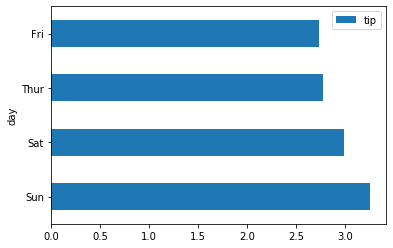

In [99]:
tipdf.groupby(['day'])[['tip']].agg('mean').sort_values(by='tip',ascending=False).plot(kind='barh')


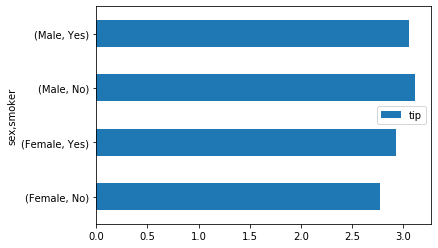

In [96]:
tipdf.groupby(['sex','smoker'])[['tip']].agg('mean').plot(kind='barh')
plt.show()

### 알아두면 좋은 함수, 속성들

In [100]:
#1. Unique()
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [102]:
df.describe()

,CountA,CountB
count,8.000000,8.00000
mean,6.000000,5.37500
std,2.203893,2.66927
min,3.000000,1.00000
25%,4.500000,3.75000
50%,6.500000,5.50000
75%,7.250000,7.25000
max,9.000000,9.00000


In [104]:
df.count()

Gender     8
Smoking    8
CountA     8
CountB     8
dtype: int64

In [106]:
df['Gender'].value_counts()

Female    5
Male      3
Name: Gender, dtype: int64

In [112]:
# apply
'''
판다스에서 내가 함수를 만들어서 적용할때 사용
판다스에서 제공하지 않는 함수를 내가 직접 만들어서 사용할 수 있다.
'''

def add(x):
    return x+100

df[['CountA']].apply(add).merge(df[['CountA']])

,CountA


In [113]:
df[['CountA']].apply(add)

,CountA
0,107
1,106
2,109
3,103
4,108
5,103
6,105
7,107


In [122]:
tipdf.groupby('day')

,total_bill,tip,size
day,,,
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105
Thur,17.682742,2.771452,2.451613


In [123]:
# agg의 장점 2
df[['CountA']].agg(add) # apply말고도 agg로도 사용자 정의 함수 사용가능 

,CountA
0,107
1,106
2,109
3,103
4,108
5,103
6,105
7,107
